## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.83075 | train_mse: 1.53902 | train_mae: 0.88857 |  0:00:00s


epoch 1  | loss: 1.14784 | train_mse: 1.2882  | train_mae: 0.71059 |  0:00:00s


epoch 2  | loss: 0.66823 | train_mse: 0.75848 | train_mae: 0.58801 |  0:00:01s


epoch 3  | loss: 0.50579 | train_mse: 0.59069 | train_mae: 0.49833 |  0:00:01s


epoch 4  | loss: 0.49618 | train_mse: 0.49327 | train_mae: 0.48638 |  0:00:01s


epoch 5  | loss: 0.39543 | train_mse: 0.43047 | train_mae: 0.46438 |  0:00:01s


epoch 6  | loss: 0.41758 | train_mse: 0.43646 | train_mae: 0.43703 |  0:00:02s


epoch 7  | loss: 0.40069 | train_mse: 0.27142 | train_mae: 0.38214 |  0:00:02s


epoch 8  | loss: 0.31312 | train_mse: 0.31592 | train_mae: 0.38036 |  0:00:02s


epoch 9  | loss: 0.34383 | train_mse: 0.37166 | train_mae: 0.40099 |  0:00:03s


epoch 10 | loss: 0.32578 | train_mse: 0.31661 | train_mae: 0.36847 |  0:00:03s


epoch 11 | loss: 0.31511 | train_mse: 0.23477 | train_mae: 0.34224 |  0:00:03s


epoch 12 | loss: 0.27677 | train_mse: 0.21823 | train_mae: 0.34212 |  0:00:04s


epoch 13 | loss: 0.27325 | train_mse: 0.20513 | train_mae: 0.31908 |  0:00:04s


epoch 14 | loss: 0.22778 | train_mse: 0.19426 | train_mae: 0.30649 |  0:00:04s


epoch 15 | loss: 0.27299 | train_mse: 0.18892 | train_mae: 0.30303 |  0:00:05s


epoch 16 | loss: 0.23525 | train_mse: 0.17467 | train_mae: 0.28494 |  0:00:05s


epoch 17 | loss: 0.30273 | train_mse: 0.17885 | train_mae: 0.28397 |  0:00:05s


epoch 18 | loss: 0.22046 | train_mse: 0.16522 | train_mae: 0.27207 |  0:00:06s


epoch 19 | loss: 0.22217 | train_mse: 0.19726 | train_mae: 0.29116 |  0:00:06s


epoch 20 | loss: 0.23213 | train_mse: 0.16648 | train_mae: 0.27819 |  0:00:06s


epoch 21 | loss: 0.25286 | train_mse: 0.17263 | train_mae: 0.2866  |  0:00:07s


epoch 22 | loss: 0.22599 | train_mse: 0.15565 | train_mae: 0.27565 |  0:00:07s


epoch 23 | loss: 0.19916 | train_mse: 0.17079 | train_mae: 0.26986 |  0:00:07s


epoch 24 | loss: 0.21236 | train_mse: 0.18243 | train_mae: 0.27914 |  0:00:08s


epoch 25 | loss: 0.22748 | train_mse: 0.17003 | train_mae: 0.27461 |  0:00:08s


epoch 26 | loss: 0.22101 | train_mse: 0.16953 | train_mae: 0.28845 |  0:00:08s


epoch 27 | loss: 0.26888 | train_mse: 0.15949 | train_mae: 0.27418 |  0:00:09s


epoch 28 | loss: 0.1991  | train_mse: 0.14935 | train_mae: 0.27009 |  0:00:09s


epoch 29 | loss: 0.21304 | train_mse: 0.18338 | train_mae: 0.29432 |  0:00:09s


epoch 30 | loss: 0.21188 | train_mse: 0.15945 | train_mae: 0.27111 |  0:00:09s


epoch 31 | loss: 0.2188  | train_mse: 0.17246 | train_mae: 0.28554 |  0:00:10s


epoch 32 | loss: 0.18791 | train_mse: 0.15312 | train_mae: 0.2618  |  0:00:10s


epoch 33 | loss: 0.22388 | train_mse: 0.15331 | train_mae: 0.27519 |  0:00:10s


epoch 34 | loss: 0.23204 | train_mse: 0.14898 | train_mae: 0.25846 |  0:00:11s


epoch 35 | loss: 0.20711 | train_mse: 0.17075 | train_mae: 0.27582 |  0:00:11s


epoch 36 | loss: 0.2131  | train_mse: 0.12937 | train_mae: 0.24742 |  0:00:11s


epoch 37 | loss: 0.14623 | train_mse: 0.15994 | train_mae: 0.28028 |  0:00:11s


epoch 38 | loss: 0.18586 | train_mse: 0.14853 | train_mae: 0.27948 |  0:00:12s


epoch 39 | loss: 0.17617 | train_mse: 0.11781 | train_mae: 0.25712 |  0:00:12s


epoch 40 | loss: 0.1689  | train_mse: 0.12387 | train_mae: 0.25229 |  0:00:12s


epoch 41 | loss: 0.13394 | train_mse: 0.09845 | train_mae: 0.23774 |  0:00:13s


epoch 42 | loss: 0.17115 | train_mse: 0.10381 | train_mae: 0.2413  |  0:00:13s


epoch 43 | loss: 0.19063 | train_mse: 0.12442 | train_mae: 0.25261 |  0:00:13s


epoch 44 | loss: 0.19719 | train_mse: 0.14417 | train_mae: 0.2513  |  0:00:13s


epoch 45 | loss: 0.17317 | train_mse: 0.12059 | train_mae: 0.23    |  0:00:14s


epoch 46 | loss: 0.20916 | train_mse: 0.10614 | train_mae: 0.22975 |  0:00:14s


epoch 47 | loss: 0.22879 | train_mse: 0.10355 | train_mae: 0.23947 |  0:00:14s


epoch 48 | loss: 0.16949 | train_mse: 0.07851 | train_mae: 0.20842 |  0:00:15s


epoch 49 | loss: 0.18529 | train_mse: 0.13567 | train_mae: 0.24585 |  0:00:15s


epoch 50 | loss: 0.15459 | train_mse: 0.08729 | train_mae: 0.21349 |  0:00:16s


epoch 51 | loss: 0.12692 | train_mse: 0.10625 | train_mae: 0.23786 |  0:00:16s


epoch 52 | loss: 0.21991 | train_mse: 0.10334 | train_mae: 0.21974 |  0:00:17s


epoch 53 | loss: 0.1694  | train_mse: 0.13883 | train_mae: 0.25433 |  0:00:17s


epoch 54 | loss: 0.17359 | train_mse: 0.11671 | train_mae: 0.24153 |  0:00:17s


epoch 55 | loss: 0.18923 | train_mse: 0.09918 | train_mae: 0.23276 |  0:00:18s


epoch 56 | loss: 0.17655 | train_mse: 0.0833  | train_mae: 0.22033 |  0:00:18s


epoch 57 | loss: 0.16515 | train_mse: 0.08446 | train_mae: 0.2184  |  0:00:19s


epoch 58 | loss: 0.13764 | train_mse: 0.09466 | train_mae: 0.23726 |  0:00:19s


epoch 59 | loss: 0.13934 | train_mse: 0.08708 | train_mae: 0.21556 |  0:00:19s


epoch 60 | loss: 0.20527 | train_mse: 0.08796 | train_mae: 0.22271 |  0:00:20s


epoch 61 | loss: 0.16061 | train_mse: 0.08351 | train_mae: 0.21496 |  0:00:20s


epoch 62 | loss: 0.15489 | train_mse: 0.09614 | train_mae: 0.22723 |  0:00:21s


epoch 63 | loss: 0.10958 | train_mse: 0.07652 | train_mae: 0.20408 |  0:00:21s


epoch 64 | loss: 0.18655 | train_mse: 0.08679 | train_mae: 0.21112 |  0:00:22s


epoch 65 | loss: 0.13254 | train_mse: 0.08991 | train_mae: 0.22512 |  0:00:22s


epoch 66 | loss: 0.20898 | train_mse: 0.10825 | train_mae: 0.23959 |  0:00:22s


epoch 67 | loss: 0.15349 | train_mse: 0.10159 | train_mae: 0.23082 |  0:00:23s


epoch 68 | loss: 0.16164 | train_mse: 0.0786  | train_mae: 0.20685 |  0:00:23s


epoch 69 | loss: 0.15464 | train_mse: 0.10359 | train_mae: 0.22149 |  0:00:23s


epoch 70 | loss: 0.19285 | train_mse: 0.08318 | train_mae: 0.2147  |  0:00:24s


epoch 71 | loss: 0.12282 | train_mse: 0.0951  | train_mae: 0.22171 |  0:00:24s


epoch 72 | loss: 0.17498 | train_mse: 0.07607 | train_mae: 0.20475 |  0:00:24s


epoch 73 | loss: 0.15919 | train_mse: 0.09354 | train_mae: 0.22236 |  0:00:25s


epoch 74 | loss: 0.1512  | train_mse: 0.08654 | train_mae: 0.21186 |  0:00:25s


epoch 75 | loss: 0.1591  | train_mse: 0.10664 | train_mae: 0.22985 |  0:00:25s


epoch 76 | loss: 0.16421 | train_mse: 0.10271 | train_mae: 0.2358  |  0:00:26s


epoch 77 | loss: 0.13976 | train_mse: 0.08619 | train_mae: 0.21132 |  0:00:26s


epoch 78 | loss: 0.15493 | train_mse: 0.09053 | train_mae: 0.22277 |  0:00:26s


epoch 79 | loss: 0.16333 | train_mse: 0.12165 | train_mae: 0.23138 |  0:00:26s


epoch 80 | loss: 0.19905 | train_mse: 0.10851 | train_mae: 0.22488 |  0:00:27s


epoch 81 | loss: 0.16836 | train_mse: 0.13051 | train_mae: 0.24837 |  0:00:27s


epoch 82 | loss: 0.16031 | train_mse: 0.12427 | train_mae: 0.24101 |  0:00:27s


epoch 83 | loss: 0.17883 | train_mse: 0.12373 | train_mae: 0.22892 |  0:00:27s


epoch 84 | loss: 0.17047 | train_mse: 0.10504 | train_mae: 0.22354 |  0:00:28s


epoch 85 | loss: 0.17786 | train_mse: 0.11205 | train_mae: 0.22683 |  0:00:28s


epoch 86 | loss: 0.17766 | train_mse: 0.1133  | train_mae: 0.24312 |  0:00:28s


epoch 87 | loss: 0.14613 | train_mse: 0.13711 | train_mae: 0.25227 |  0:00:29s


epoch 88 | loss: 0.13181 | train_mse: 0.10408 | train_mae: 0.21852 |  0:00:29s


epoch 89 | loss: 0.14197 | train_mse: 0.11932 | train_mae: 0.23315 |  0:00:29s


epoch 90 | loss: 0.16723 | train_mse: 0.07584 | train_mae: 0.20362 |  0:00:30s


epoch 91 | loss: 0.1315  | train_mse: 0.07693 | train_mae: 0.20449 |  0:00:30s


epoch 92 | loss: 0.17053 | train_mse: 0.10569 | train_mae: 0.23728 |  0:00:30s


epoch 93 | loss: 0.14215 | train_mse: 0.09878 | train_mae: 0.23262 |  0:00:30s


epoch 94 | loss: 0.1268  | train_mse: 0.09609 | train_mae: 0.23014 |  0:00:31s


epoch 95 | loss: 0.13927 | train_mse: 0.12353 | train_mae: 0.24736 |  0:00:31s


epoch 96 | loss: 0.11282 | train_mse: 0.06887 | train_mae: 0.19166 |  0:00:31s


epoch 97 | loss: 0.15671 | train_mse: 0.07583 | train_mae: 0.19567 |  0:00:32s


epoch 98 | loss: 0.13041 | train_mse: 0.07698 | train_mae: 0.20562 |  0:00:32s


epoch 99 | loss: 0.12076 | train_mse: 0.08403 | train_mae: 0.21286 |  0:00:32s


epoch 100| loss: 0.15857 | train_mse: 0.0726  | train_mae: 0.20312 |  0:00:33s


epoch 101| loss: 0.14671 | train_mse: 0.08549 | train_mae: 0.21866 |  0:00:33s


epoch 102| loss: 0.14759 | train_mse: 0.06974 | train_mae: 0.20262 |  0:00:34s


epoch 103| loss: 0.12202 | train_mse: 0.08603 | train_mae: 0.22271 |  0:00:34s


epoch 104| loss: 0.14078 | train_mse: 0.08272 | train_mae: 0.2156  |  0:00:34s


epoch 105| loss: 0.15445 | train_mse: 0.08265 | train_mae: 0.21062 |  0:00:35s


epoch 106| loss: 0.16534 | train_mse: 0.08724 | train_mae: 0.2154  |  0:00:35s


epoch 107| loss: 0.13368 | train_mse: 0.0874  | train_mae: 0.21631 |  0:00:35s


epoch 108| loss: 0.14049 | train_mse: 0.10208 | train_mae: 0.23373 |  0:00:35s


epoch 109| loss: 0.16105 | train_mse: 0.08788 | train_mae: 0.22042 |  0:00:36s


epoch 110| loss: 0.12329 | train_mse: 0.11138 | train_mae: 0.24141 |  0:00:36s


epoch 111| loss: 0.16718 | train_mse: 0.10677 | train_mae: 0.23548 |  0:00:36s


epoch 112| loss: 0.13848 | train_mse: 0.11309 | train_mae: 0.24496 |  0:00:37s


epoch 113| loss: 0.15834 | train_mse: 0.1107  | train_mae: 0.23609 |  0:00:37s


epoch 114| loss: 0.17314 | train_mse: 0.1251  | train_mae: 0.25817 |  0:00:37s


epoch 115| loss: 0.12189 | train_mse: 0.11214 | train_mae: 0.22925 |  0:00:37s


epoch 116| loss: 0.13817 | train_mse: 0.08642 | train_mae: 0.22405 |  0:00:38s


epoch 117| loss: 0.11722 | train_mse: 0.08293 | train_mae: 0.21393 |  0:00:38s


epoch 118| loss: 0.1366  | train_mse: 0.10073 | train_mae: 0.22847 |  0:00:38s


epoch 119| loss: 0.16134 | train_mse: 0.11913 | train_mae: 0.23204 |  0:00:39s


epoch 120| loss: 0.14882 | train_mse: 0.10131 | train_mae: 0.22315 |  0:00:39s


epoch 121| loss: 0.14942 | train_mse: 0.08695 | train_mae: 0.21672 |  0:00:39s


epoch 122| loss: 0.1701  | train_mse: 0.07131 | train_mae: 0.19831 |  0:00:39s


epoch 123| loss: 0.14698 | train_mse: 0.08206 | train_mae: 0.21192 |  0:00:40s


epoch 124| loss: 0.20616 | train_mse: 0.08836 | train_mae: 0.22139 |  0:00:40s


epoch 125| loss: 0.09984 | train_mse: 0.07602 | train_mae: 0.19871 |  0:00:40s


epoch 126| loss: 0.13148 | train_mse: 0.06679 | train_mae: 0.19048 |  0:00:41s


epoch 127| loss: 0.14812 | train_mse: 0.07369 | train_mae: 0.19931 |  0:00:41s


epoch 128| loss: 0.14949 | train_mse: 0.07335 | train_mae: 0.19742 |  0:00:41s


epoch 129| loss: 0.11935 | train_mse: 0.09109 | train_mae: 0.21463 |  0:00:41s


epoch 130| loss: 0.13954 | train_mse: 0.08049 | train_mae: 0.20686 |  0:00:42s


epoch 131| loss: 0.12123 | train_mse: 0.08072 | train_mae: 0.21038 |  0:00:42s


epoch 132| loss: 0.12136 | train_mse: 0.10256 | train_mae: 0.23094 |  0:00:43s


epoch 133| loss: 0.15473 | train_mse: 0.0803  | train_mae: 0.20728 |  0:00:43s


epoch 134| loss: 0.14267 | train_mse: 0.07286 | train_mae: 0.19903 |  0:00:43s


epoch 135| loss: 0.15188 | train_mse: 0.08186 | train_mae: 0.21296 |  0:00:43s


epoch 136| loss: 0.11815 | train_mse: 0.07693 | train_mae: 0.19874 |  0:00:44s


epoch 137| loss: 0.12457 | train_mse: 0.08467 | train_mae: 0.20319 |  0:00:44s


epoch 138| loss: 0.11554 | train_mse: 0.07989 | train_mae: 0.21017 |  0:00:44s


epoch 139| loss: 0.10843 | train_mse: 0.07433 | train_mae: 0.1989  |  0:00:45s


epoch 140| loss: 0.12453 | train_mse: 0.09471 | train_mae: 0.21838 |  0:00:45s


epoch 141| loss: 0.1196  | train_mse: 0.07325 | train_mae: 0.19751 |  0:00:45s


epoch 142| loss: 0.17419 | train_mse: 0.08907 | train_mae: 0.2147  |  0:00:45s


epoch 143| loss: 0.12647 | train_mse: 0.11849 | train_mae: 0.23021 |  0:00:46s


epoch 144| loss: 0.13535 | train_mse: 0.09252 | train_mae: 0.21447 |  0:00:46s


epoch 145| loss: 0.16094 | train_mse: 0.09552 | train_mae: 0.22383 |  0:00:46s


epoch 146| loss: 0.11052 | train_mse: 0.07573 | train_mae: 0.20179 |  0:00:47s


epoch 147| loss: 0.13693 | train_mse: 0.16403 | train_mae: 0.25003 |  0:00:47s


epoch 148| loss: 0.14536 | train_mse: 0.11164 | train_mae: 0.21987 |  0:00:47s


epoch 149| loss: 0.16424 | train_mse: 0.11062 | train_mae: 0.2436  |  0:00:47s


epoch 150| loss: 0.145   | train_mse: 0.08723 | train_mae: 0.22679 |  0:00:48s


epoch 151| loss: 0.18695 | train_mse: 0.08589 | train_mae: 0.22115 |  0:00:48s


epoch 152| loss: 0.12674 | train_mse: 0.10515 | train_mae: 0.22498 |  0:00:48s


epoch 153| loss: 0.13033 | train_mse: 0.09274 | train_mae: 0.21846 |  0:00:49s


epoch 154| loss: 0.15022 | train_mse: 0.07638 | train_mae: 0.20698 |  0:00:49s


epoch 155| loss: 0.11198 | train_mse: 0.07917 | train_mae: 0.20881 |  0:00:49s


epoch 156| loss: 0.14301 | train_mse: 0.11086 | train_mae: 0.23034 |  0:00:49s


epoch 157| loss: 0.149   | train_mse: 0.08855 | train_mae: 0.20091 |  0:00:50s


epoch 158| loss: 0.15871 | train_mse: 0.0715  | train_mae: 0.19673 |  0:00:50s


epoch 159| loss: 0.12401 | train_mse: 0.09678 | train_mae: 0.21255 |  0:00:50s


epoch 160| loss: 0.17995 | train_mse: 0.09035 | train_mae: 0.22003 |  0:00:51s


epoch 161| loss: 0.10912 | train_mse: 0.09493 | train_mae: 0.2141  |  0:00:51s


epoch 162| loss: 0.10869 | train_mse: 0.11135 | train_mae: 0.22256 |  0:00:51s


epoch 163| loss: 0.12518 | train_mse: 0.13041 | train_mae: 0.22588 |  0:00:51s


epoch 164| loss: 0.15463 | train_mse: 0.12105 | train_mae: 0.2433  |  0:00:52s


epoch 165| loss: 0.15413 | train_mse: 0.11944 | train_mae: 0.21679 |  0:00:52s


epoch 166| loss: 0.1148  | train_mse: 0.102   | train_mae: 0.22975 |  0:00:52s


epoch 167| loss: 0.11613 | train_mse: 0.12038 | train_mae: 0.22853 |  0:00:53s


epoch 168| loss: 0.14732 | train_mse: 0.08587 | train_mae: 0.21559 |  0:00:53s


epoch 169| loss: 0.14384 | train_mse: 0.11108 | train_mae: 0.24153 |  0:00:53s


epoch 170| loss: 0.1375  | train_mse: 0.17305 | train_mae: 0.24658 |  0:00:54s


epoch 171| loss: 0.13095 | train_mse: 0.11849 | train_mae: 0.24768 |  0:00:54s


epoch 172| loss: 0.13696 | train_mse: 0.10239 | train_mae: 0.21728 |  0:00:54s


epoch 173| loss: 0.12676 | train_mse: 0.13886 | train_mae: 0.23313 |  0:00:54s


epoch 174| loss: 0.13769 | train_mse: 0.14266 | train_mae: 0.24103 |  0:00:55s


epoch 175| loss: 0.17875 | train_mse: 0.10045 | train_mae: 0.22319 |  0:00:55s


epoch 176| loss: 0.19746 | train_mse: 0.1042  | train_mae: 0.22445 |  0:00:55s

Early stopping occurred at epoch 176 with best_epoch = 126 and best_train_mae = 0.19048
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2849384911877044


ABC Pre-generator MAE 0.2864223710452085


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

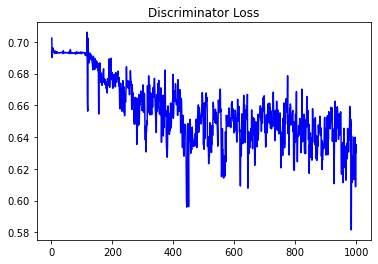

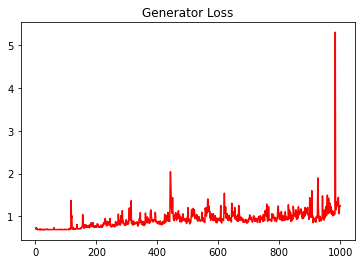

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3200784414553759


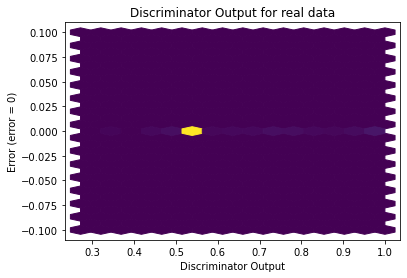

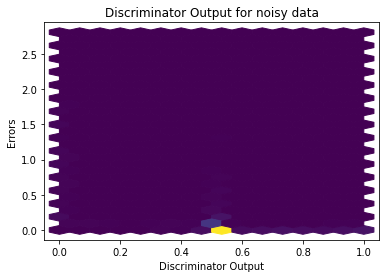

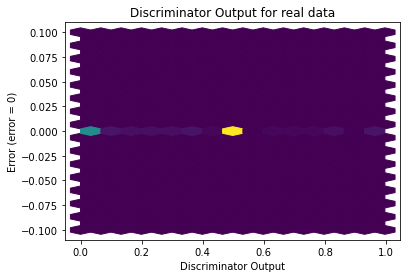

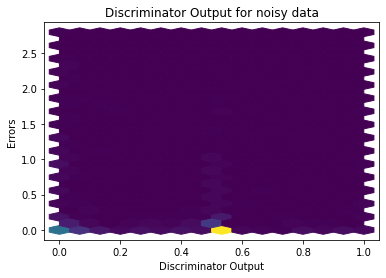

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

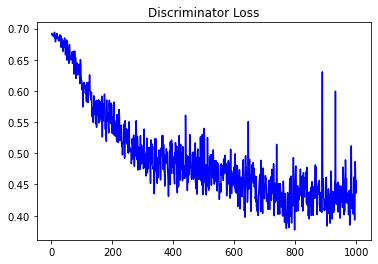

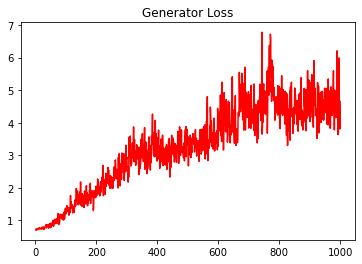

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.28859483720975676


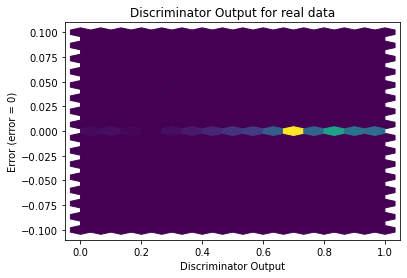

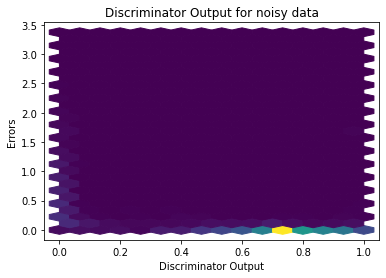

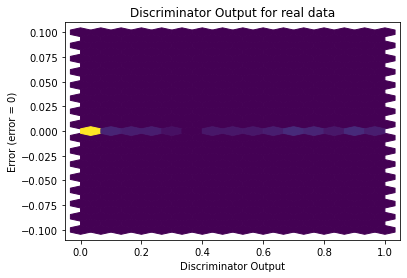

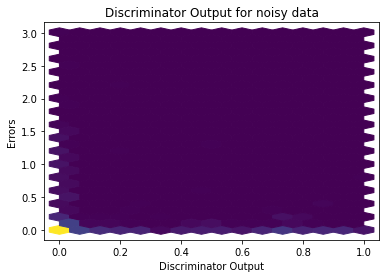

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


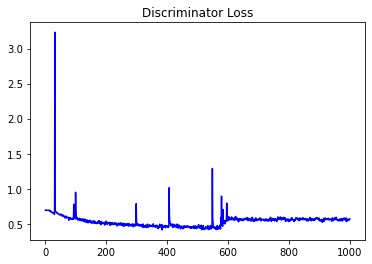

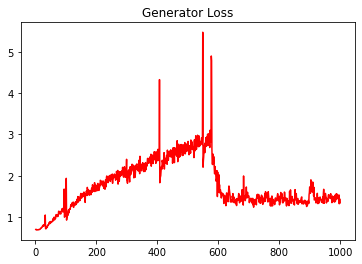

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.33563542149486203


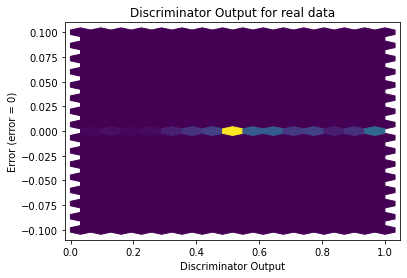

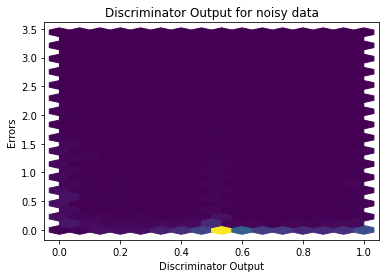

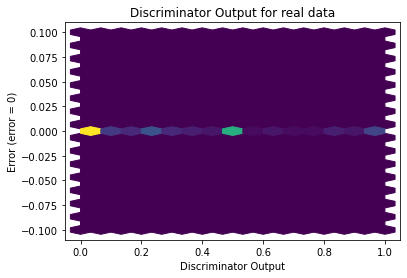

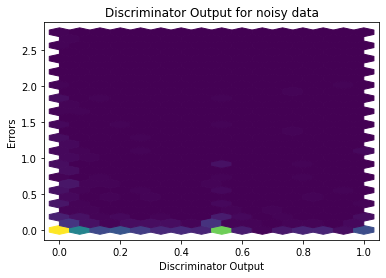

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


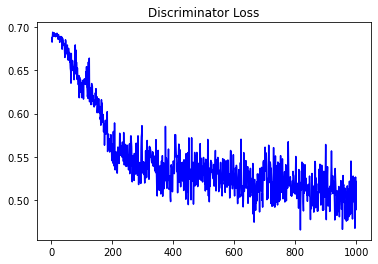

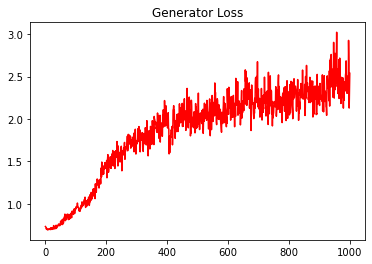

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.26651743599907585


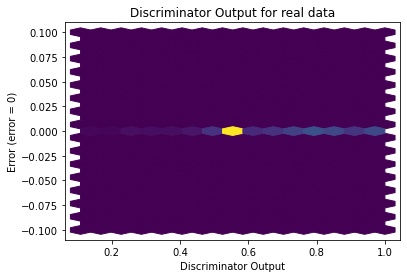

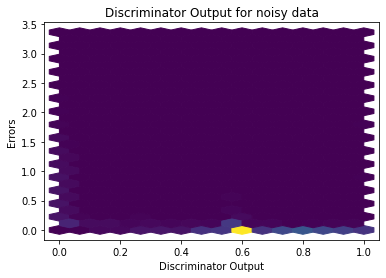

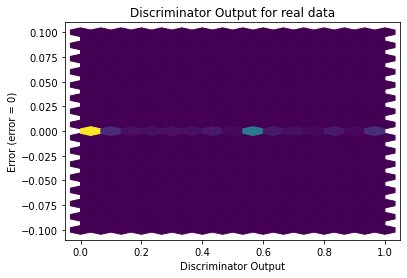

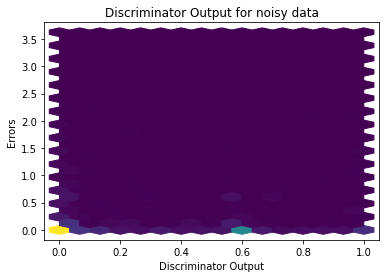

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1382]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2107]], requires_grad=True)
